In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

<function matplotlib.pyplot.show(close=None, block=None)>

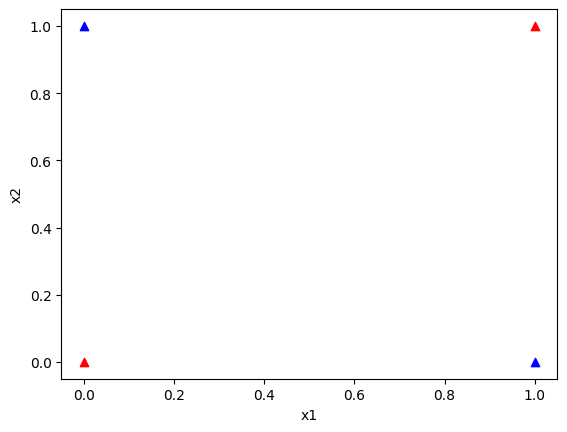

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

## Logistic Regression으로 해결

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


In [5]:
# sigmoid 함수 가설 함수로 설정
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [8]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [9]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [12]:
epochs = 1001

for step in range(epochs):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


## 3 layers의 NN으로 해결

In [13]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [16]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2], -1)
    layer3 = tf.reshape(layer3, shape = [-1, 2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [18]:
EPOCHS = 5000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.5915
Testset Accuracy: 0.7500


## Deep Neural Network로 해결

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()

        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]

    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels

    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis

    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)

    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))
    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [20]:
model = wide_deep_nn(nb_classes)

In [21]:
model.fit(dataset)

Iter: 0, Loss: 1.3109
Iter: 500, Loss: 0.7002
Iter: 1000, Loss: 0.6930
Iter: 1500, Loss: 0.6874
Iter: 2000, Loss: 0.6830
Iter: 2500, Loss: 0.6792
Iter: 3000, Loss: 0.6757
Iter: 3500, Loss: 0.6721
Iter: 4000, Loss: 0.6682
Iter: 4500, Loss: 0.6638
Iter: 5000, Loss: 0.6586
Iter: 5500, Loss: 0.6525
Iter: 6000, Loss: 0.6452
Iter: 6500, Loss: 0.6364
Iter: 7000, Loss: 0.6256
Iter: 7500, Loss: 0.6123
Iter: 8000, Loss: 0.5955
Iter: 8500, Loss: 0.5740
Iter: 9000, Loss: 0.5464
Iter: 9500, Loss: 0.5111
Iter: 10000, Loss: 0.4675
Iter: 10500, Loss: 0.4169
Iter: 11000, Loss: 0.3621
Iter: 11500, Loss: 0.3066
Iter: 12000, Loss: 0.2543
Iter: 12500, Loss: 0.2081
Iter: 13000, Loss: 0.1694
Iter: 13500, Loss: 0.1384
Iter: 14000, Loss: 0.1139
Iter: 14500, Loss: 0.0949
Iter: 15000, Loss: 0.0800
Iter: 15500, Loss: 0.0683
Iter: 16000, Loss: 0.0590
Iter: 16500, Loss: 0.0515
Iter: 17000, Loss: 0.0455
Iter: 17500, Loss: 0.0405
Iter: 18000, Loss: 0.0363
Iter: 18500, Loss: 0.0328
Iter: 19000, Loss: 0.0298
Iter: 1950

## Tensorboard 활용

In [23]:
log_path = "./logs/xor"
writer = tf.summary.create_file_writer(log_path)

In [24]:
W1 = tf.Variable(tf.random.normal((2, 10)), name='weight1')
b1 = tf.Variable(tf.random.normal((10,)), name='bias1')

W2 = tf.Variable(tf.random.normal((10, 10)), name='weight2')
b2 = tf.Variable(tf.random.normal((10,)), name='bias2')

W3 = tf.Variable(tf.random.normal((10, 10)), name='weight3')
b3 = tf.Variable(tf.random.normal((10,)), name='bias3')

W4 = tf.Variable(tf.random.normal((10, 1)), name='weight4')
b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

def neural_net(features, step):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

    with writer.as_default():
        tf.summary.histogram("weights1", W1, step=step)
        tf.summary.histogram("biases1", b1, step=step)
        tf.summary.histogram("layer1", layer1, step=step)

        tf.summary.histogram("weights2", W2, step=step)
        tf.summary.histogram("biases2", b2, step=step)
        tf.summary.histogram("layer2", layer2, step=step)

        tf.summary.histogram("weights3", W3, step=step)
        tf.summary.histogram("biases3", b3, step=step)
        tf.summary.histogram("layer3", layer3, step=step)

        tf.summary.histogram("weights4", W4, step=step)
        tf.summary.histogram("biases4", b4, step=step)
        tf.summary.histogram("hypothesis", hypothesis, step=step)

    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    with writer.as_default():
        tf.summary.scalar('loss', cost, step=step)
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels, step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features, step),labels)
    return tape.gradient(loss_value, [W1, W2, W3, W4, b1, b2, b3, b4])

In [25]:
EPOCHS = 3000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features, step), features, labels, step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, W4, b1, b2, b3, b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features, step),labels)
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data, step),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.7094
Iter: 50, Loss: 0.6908
Iter: 100, Loss: 0.6854
Iter: 150, Loss: 0.6809
Iter: 200, Loss: 0.6767
Iter: 250, Loss: 0.6723
Iter: 300, Loss: 0.6675
Iter: 350, Loss: 0.6621
Iter: 400, Loss: 0.6559
Iter: 450, Loss: 0.6488
Iter: 500, Loss: 0.6407
Iter: 550, Loss: 0.6315
Iter: 600, Loss: 0.6213
Iter: 650, Loss: 0.6099
Iter: 700, Loss: 0.5974
Iter: 750, Loss: 0.5835
Iter: 800, Loss: 0.5682
Iter: 850, Loss: 0.5514
Iter: 900, Loss: 0.5328
Iter: 950, Loss: 0.5121
Iter: 1000, Loss: 0.4889
Iter: 1050, Loss: 0.4628
Iter: 1100, Loss: 0.4334
Iter: 1150, Loss: 0.4006
Iter: 1200, Loss: 0.3649
Iter: 1250, Loss: 0.3274
Iter: 1300, Loss: 0.2897
Iter: 1350, Loss: 0.2536
Iter: 1400, Loss: 0.2205
Iter: 1450, Loss: 0.1912
Iter: 1500, Loss: 0.1661
Iter: 1550, Loss: 0.1448
Iter: 1600, Loss: 0.1270
Iter: 1650, Loss: 0.1121
Iter: 1700, Loss: 0.0995
Iter: 1750, Loss: 0.0890
Iter: 1800, Loss: 0.0801
Iter: 1850, Loss: 0.0725
Iter: 1900, Loss: 0.0661
Iter: 1950, Loss: 0.0605
Iter: 2000, Loss: 0.055